# How the Tails Come Apart


Why are the smartest people often apparently the laziest, or the most socially inept? Why are the attractive people often assholes? Why are great strengths so often associated with just as great flaws? In our lives, we often observe negative correlations between posisitve traits, like attractiveness and agreeableness or intelligence and social ability or conscientiousness. The strongest example of this, which I have personally observed is the apparent negative correlation between innate intelligence and willingness/ability to work hard in school.  

However, from psychometric research, we know our observed negative correlation with intelligence (proxied by IQ) and hard-workingness (proxied by conscientiousness) is actually false. There are robust findings of a *positive* correlation between the two attributes.
This is not surprising, given the highly general and robust finding of the "postitive manifold" of IQ. So how did I (and probably lots of other people) observe this strong negative correlation? What went wrong here?

The key answer is that, unlike in psychometrics, you are not observing an unbiased sample of the population. Your sample is biased in a very specific way. It is filtered against precisely the qualities you are observing.
When you compete in high-school to get the highest test results, your sample of competitors is precisely those people who have high enough test-scores to be worth competing against. If test-scores are reasonably well correlated with both IQ and conscientiousness, then our observed sample is heavily filtered according to the attributes that we are observing. Intuitively, even with this selection bias, switching from a strong positive to a strong negative correlation seems quite a feat. My goal in this blog is to characterise this phenomenon empirically and show that this is in fact very possible with standard parameter values.

This phenomenon has a name. I was first introduced to it in this excellent less-wrong article [why the tails come apart](https://www.lesswrong.com/posts/dC7mP5nSwvpL65Qu5/why-the-tails-come-apart), which provides excellent intuition and graphical examples. The tails-coming-apart phenomenon pervades much of everyday life, as almost always you are not interacting with a fully unbiased sample of the total population, but a sample that has been selected in some way. If you observe correlations between traits within this sample population, you will observe that they are typically smaller than within the full population, if the sample is selected according to those traits. 

The intuition is simple. We have a full distribution of some $x$ and $y$ traits which have some correlation. If these are normally distributed, they form an ellispe. Selection effectively imposes a floor below which samples will not be counted. Imagine drawing a line across the top of the ellipse and only samples above the line are counted. Clearly, we can imagine that the correlations observed in the filtered sample will differ substantially, and specifically that the line above the ellipse may in fact be negatively correlated.

Although intuitively this makes sense, I've not yet seen a stringent mathematical characterisation of the strength of this effect, or how it varies depending on crucial parameters like the type of selection mechanism employed,
the stringency of the cutoffs, and the intrinsic objective correlation or anticorrelation between the variables. 

Luckily, simulating these sorts of things and getting empirical results is very simple. Perhaps empiricism can provide some insight where theory is currently lacking. 

First let's try to reproduce the most basic effect. Let's assume we have two traits $x$ and $y$ which are both normally distribted (as most traits are) and that they have some fixed and known positive correlation. Together $p(x,y)$ forms a bivariate normal distribution. If we plot samples from $x$ and $y$ together on a 2d plot we can see it forms an ellipse. It is a narrow ellipse if there is a high correlation between $x$ and $y$ and tends towards a circle as the correlation tends to 0. Here we generate 4 sets of samples from a bivariate normal with different correlations to visualize how the underlying distribution changes.

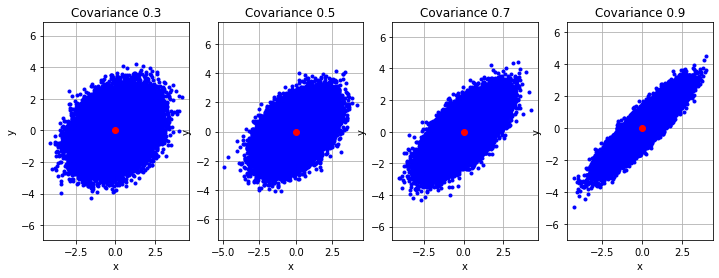

In [1]:
import numpy as np 
import scipy 
import matplotlib.pyplot as plt

num_samples = 100000
mu = np.array([0.0, 0.0]) # The desired mean values of the sample.
# utility function to define a bivariate normal distribution with a given covariance
def normal_with_cov(cov,num_samples):
  r = np.array([
          [  1, cov],
          [cov,  1]
      ])
  samps = np.random.multivariate_normal(mu, r, size=num_samples)
  return samps

covs = [0.3,0.5,0.7,0.9] # set of covariances to plot

# plot each covariance
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12,4))
sample_list = [normal_with_cov(cov, num_samples) for cov in covs]
for i, ax in enumerate(axs.flatten()):
  samps = sample_list[i]
  plt.sca(ax)
  plt.plot(samps[:,0], samps[:,1], 'b.')
  plt.plot(mu[0], mu[1], 'ro')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.axis('equal')
  plt.grid(True)
  plt.title("Covariance " + str(covs[i]))
plt.show()

Now let's reproduce the basic effect. Let's apply a selection floor to the variables and see what comes out. It is important to note that there are two possible types of selection, which I call *additive filtering* and *multiplicative filtering*. In multiplicative filtering, we require *both* $x$ *and* $y$ to be above some threshold. That is $x$ and $y$ are filtered *independently*. A second type of filtering, which I call *additive filtering* requires that the *sum* $x + y$ be above some threshold. This means that $x$ and $y$ are no longer filtered separately. A high $x$ score can save a poor $y$ score and vice-versa. Unsurprisingly these two different filtering mechanisms have different effects on the outcome, and it's worth thinking about which applies to any given situation (or some combination of the two). However, the tails-come-apart phenomenon works with both types of filtering.

We define each type of filtering in the functions below. 

In [2]:
def multiplicative_filter(samps, thresh):
  filtered = []
  for el in samps:
    if np.min(el) >= thresh: # all elements must be above threshold. 
      filtered.append(el)
  filtered = np.array(filtered)
  return filtered

def additive_filter(samps, thresh):
  filtered = []
  for el in samps:
    if np.sum(el) >= thresh * len(el): # so that the threshold is equal
      filtered.append(el)
  filtered = np.array(filtered)
  return filtered


Let's visualize what these different filtering methods do to a distribution. We use a bivariate normal with a covariance of 0.5 as an example. Try varying the threshold and the covariance to see what happens

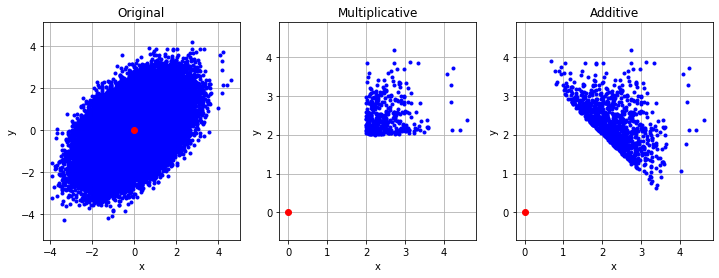

In [3]:
# apply filtered
threshold = 2
cov = 0.5
samples = normal_with_cov(cov, num_samples)

# filter the original samples
multiplicative_filtered = multiplicative_filter(samples, threshold)
additive_filtered = additive_filter(samples, threshold)

# plot the results
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
sample_list = [samples, multiplicative_filtered, additive_filtered]
titles = ["Original","Multiplicative","Additive"]
for i, ax in enumerate(axs.flatten()):
  samps = sample_list[i]
  plt.sca(ax)
  plt.plot(samps[:,0], samps[:,1], 'b.')
  plt.plot(mu[0], mu[1], 'ro')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.axis('equal')
  plt.grid(True)
  plt.title(titles[i])
plt.show()


We see that the multiplicative sampling cuts away all of the distribution except a corner. The additive sampling is more interesting and defines a slice across the top of the distribution. Let's look at how these filtering methods affect the observed correlation between $x$ and $y$, which we know originally to be positively correlated with $R = 0.5$.

In [4]:
print("Original: ", np.corrcoef(samples[:,0],samples[:,1])[0,1])
print("Multiplicative: ", np.corrcoef(multiplicative_filtered[:,0],multiplicative_filtered[:,1])[0,1])
print("Additive: ", np.corrcoef(additive_filtered[:,0],additive_filtered[:,1])[0,1])

Original:  0.499239388815636
Multiplicative:  0.1337042101547952
Additive:  -0.5384505164742601


The tails-come-apart phenomenon can be seen very strongly with both types of filter. The observed correlation in the filtered distribution is substantially lower than the true correlation. 

The multiplicative filtering takes the original correlation of 0.5 down to 0.16 -- a substantial decrease, while the additive filter is even more impactful and flips the correlation to be a 0.5 *negative correlation*. In effect, when the additive filter is applied the observed correlation is almost exactly opposite the real correlation (!). This means that if you are observing this additively selected population, your inference about the correlation of traits is precisely opposite the true value. 

Going from 0.5 to -0.5 is a fluke of the parameters (try other parameter settings) but the effects of additive filtering are in general extremely strong. Multiplicative filtering is less strong, in general, but can substantially reduce any correlations that exist in the unfiltered distribution.

However, these numbers only showcase the effect of a single filter threshold on a single original distribution with some fixed underlying covariance. While playing with the parameters can give us some intuition, we really want to empirically investigiate and visualize the effect of the filters across a wide range of parameter settings. 

First, let's investigate what happens when we choose different *filtering thresholds*. Intuitively we expect that the more extreme the threshold chosen, the stronger the tails-come-apart effect will be. We start with a bivariate normal with a covariance between $x$ and $y$ of 0.8, although you are welcome to play with this and see how it changes.

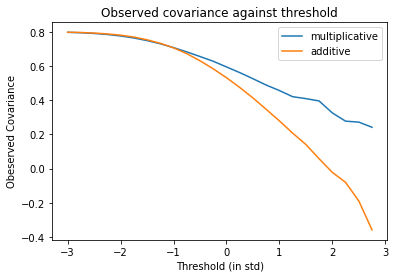

In [11]:
# utility plot function
def plot_threshold_scaling(filter,threshs, cov):
  samps = normal_with_cov(cov,100000)
  filtered_covariances = []
  for thresh in threshs:
    filt = filter(samps, thresh)
    if len(filt) >= 1:
      corr_matrix = np.corrcoef(filt[:,0],filt[:,1])
      filtered_covariances.append(corr_matrix[0,1])
  return filtered_covariances

covariance = 0.8
thresholds = np.arange(-3,3,0.25)
multiplicative_filts = plot_threshold_scaling(multiplicative_filter, thresholds,covariance)
additive_filts = plot_threshold_scaling(additive_filter,thresholds,covariance)

#plot
plt.title("Observed covariance against threshold")
plt.plot(thresholds,multiplicative_filts, label="multiplicative")
plt.plot(thresholds,additive_filts, label="additive")
plt.xlabel("Threshold (in std)")
plt.ylabel("Obeserved Covariance")
plt.legend()
plt.show()

Several interesting effects are immediately apparent. Firstly, there is a very strong effect of threshold on the observed correlation. Higher thresholds lead to lower observed correlation for both additive and multiplicative filtering. This is intuitive. The stronger the selection the more biased the outcome.

Interestingly, for negative thresholds (i.e. less than half the distribution is being filtered out), there is no effective distinction between additive and multiplicative thresholds, and there is very little (although some) evidence of the tails-come-apart phenomenon. In general filtering the bottom half of the distribution out generates relatively little bias in observed correlations.

However this bias rises steeply for higher thresholds. The additive is substantially stronger than the multiplicative and can cause negative observed correlations even when the real underlying correlation is 0.8 when the threshold $\geq$ two standard deviations. 2 standard deviations is not a particularly high selection floor for elite institutions so we should generally expect high spurious negative correlations to be observed in these samples due to this phenomenon. 

The observed correlation of multiplicative filtering declines much more slowly and remains high even with very high thresholds. I nterestingly, both types of filtering appear to show a linear decline of correlation against threshold when the threshold passes the 0 mark, which is sustained right until the highest thresholds tested (3sd) while prior to the 0 mark, the decline is sublinear. Perhaps this pattern is effectively a sigmoid curve where the top of the sigmoid is unreachable due to the very high thresholds it requires which necessitates huge amounts of original samples being drawn to be able to accurately represent these areas.

While the empirical results are interesting and suggestive here, I don't know of any analytical results pointing to why we obtain this potentially sigmoidal function of correlation vs threshold.

The other key parameter here to investigate is how the covariance of the original distribution affects the observed covariances after filtering.

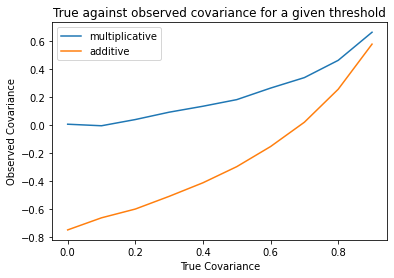

In [12]:
def plot_covariance_scaling(filter,covs,thresh):
  filtered_covariances = []
  for cov in covs:
    samps = normal_with_cov(cov, 100000)
    filt = filter(samps, thresh)
    corr_matrix = np.corrcoef(filt[:,0],filt[:,1])
    filtered_covariances.append(corr_matrix[0,1])
  return filtered_covariances

covariances = np.arange(0,1,0.1)
threshold = 1 

# get covariances
multiplicative_covariances = plot_covariance_scaling(multiplicative_filter,covariances,threshold)
additive_covariances = plot_covariance_scaling(additive_filter,covariances,threshold)
# plot
plt.title("True against observed covariance for a given threshold")
plt.plot(covariances,multiplicative_covariances, label="multiplicative")
plt.plot(covariances,additive_covariances, label="additive")
plt.xlabel("True Covariance")
plt.ylabel("Observed Covariance")
plt.legend()
plt.show()

Here we obtain another interesting result. Again the additive filtering results in a much larger decrease in the observed correlation than the multiplicative correlation. Secondly, we see that the multiplicative correlation is lower-bounded at 0 -- it cannot produce a spurious negative correlation, only reduce the true positive correlation. Finally, we see that the the observed correlation increases apparently *exponentially* towards 1 as the true correlation tends to 1. This makes sense since if the correlation is 1, there are no tails to come apart in the first place, since $x$ and $y$ become identical. This means, in general, that the strength of the tails-comes-aparts phenomenon declines with very highly correlated variables.

Thus, overall, it appears that this phenomenon is strongest when there is very strong, additive selection on relatively uncorrelated variables. In this regime the additive correlation can produce very strong (0.8 here) negative correlations even when the true correlation might be positive. Funnily enough this regime precisely describes the kinds of environments where this phenomenon is often described. Elite institutions generally have strong additive selection floors, which select on moderately positively correlated traits (i.e. intelligence and conscientiousness), and thus it is not surprising that we should observe many spurious negative correlations within these cohorts. In fact, the predicted strength $\approx -0.5\text{-}0.8$ of the correlation is actually much *stronger* than I would have expected given my own experience. This implies that either the selection floor is not as stringent as expected or else the correlation between the variables in the true population is higher than reported in the psychometric literature (potentially due to exactly this bias in the typical samples for these experiments -- i.e. psychology undergraduate students).

The strength and subtlety of these effects does raise a potential worry for psychometrics or other studies which investigate trait correlations among filtered subsets of the population. Filtering like this can introduce very specific and strong biases in populations which I am not sure whether the traditional methods of "controlling" for various variables can really account. for. The general practice of looking for correlations like these in populations selected for these traits (such as psychology undergraduates) will most likely *underestimate* the true correlation in the full population.

However, given these curves, and an understanding of the tails-come-apart phenomenon it should be possible to precisely correct for the bias. If we know the level and type of selection, as well as the observed correlation between variables, we should be able to recover a good estimate of the true correlation in the real population. Perhaps more interestingly, we can also turn this around. If we have samples from a selected and an unselected population we can infer the likely strength of selection purely from the differences in correlations between traits in the two populations. This could be very useful in sociological research for determining the actual effectiveness of various types of tests. It could also be potentially useful in evolutionary biology as a test for the strength of selection operating on a population.